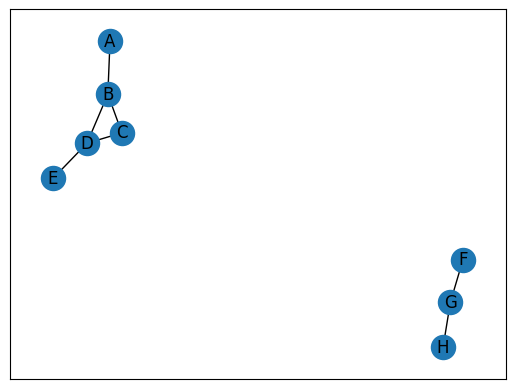

In [38]:
import networkx as nx

graph = nx.Graph()

graph.add_edge("A", "B")
graph.add_edge("B", "C")
graph.add_edges_from(
    [
        ("B", "D"),
        ("C", "D"),
        ("D", "E"),
        ("G", "F"),
        ("G", "H"),
    ]
)

nx.draw_networkx(graph)

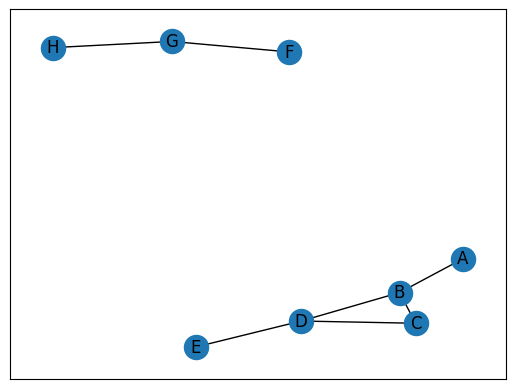

In [33]:
# 描画の仕方はランダム
nx.draw_networkx(graph)

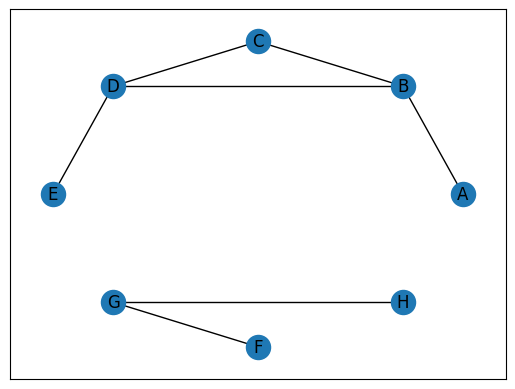

In [35]:
# 描画の仕方を指定
nx.draw_networkx(graph, pos=nx.circular_layout(graph))

In [39]:
# NetworkXを使ったグラフの解析
graph.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'G', 'F', 'H'))

In [51]:
graph.edges()

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('G', 'F'), ('G', 'H')])

In [41]:
graph["C"]

AtlasView({'B': {}, 'D': {}})

In [42]:
graph["A"]["B"]

{}

In [ ]:
# エッジに属性を追加
for s, t in graph.edges():
    graph[s][t]["value"] = abs(ord(s[0]) - ord(t[0]))
graph["A"]["B"]

{'value': 1}

In [49]:
graph["B"]

AtlasView({'A': {'value': 1}, 'C': {'value': 1}, 'D': {'value': 2}})

In [52]:
graph.edges(data=True)

EdgeDataView([('A', 'B', {'value': 1}), ('B', 'C', {'value': 1}), ('B', 'D', {'value': 2}), ('C', 'D', {'value': 1}), ('D', 'E', {'value': 1}), ('G', 'F', {'value': 1}), ('G', 'H', {'value': 1})])

In [46]:
print(graph.size())
print(len(graph.nodes()) == graph.size())
print(len(graph.edges()) == graph.size())

7
False
True


In [47]:
graph.size(weight="value")

8.0

In [55]:
# ノードに属性を追加
for node in graph.nodes():
    graph.nodes[node]["value"] = ord(node[0]) - ord("A") + 1

In [56]:
graph.nodes["A"]

{'value': 1}

In [57]:
graph.nodes(data=True)

NodeDataView({'A': {'value': 1}, 'B': {'value': 2}, 'C': {'value': 3}, 'D': {'value': 4}, 'E': {'value': 5}, 'G': {'value': 7}, 'F': {'value': 6}, 'H': {'value': 8}})

In [59]:
# グラフ上の情報を取得
print(nx.has_path(graph, "A", "B"))
print(nx.has_path(graph, "A", "E"))
print(nx.has_path(graph, "A", "G"))

True
True
False


In [62]:
print(list(nx.all_shortest_paths(graph, source="A", target="E")))
print(list(nx.all_shortest_paths(graph, source="A", target="G")))

[['A', 'B', 'D', 'E']]


NetworkXNoPath: Target G cannot be reached from given sources

In [63]:
nx.is_connected(graph)

False

In [69]:
cc_list = list(
    sorted(
        nx.connected_components(graph),
        key=lambda x: len(x),
        reverse=True,
    )
)
cc_list

[{'A', 'B', 'C', 'D', 'E'}, {'F', 'G', 'H'}]

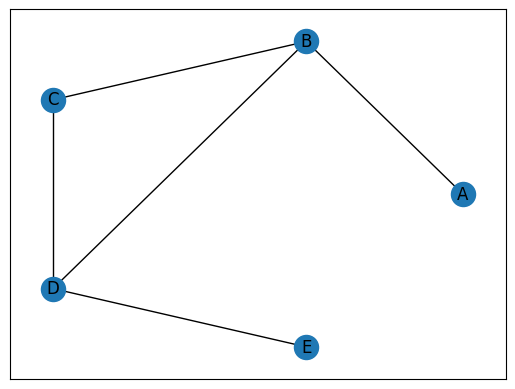

In [72]:
graph_0 = graph.subgraph(cc_list[0])
nx.draw_networkx(graph_0, pos=nx.circular_layout(graph_0))

In [73]:
nx.is_connected(graph_0)

True

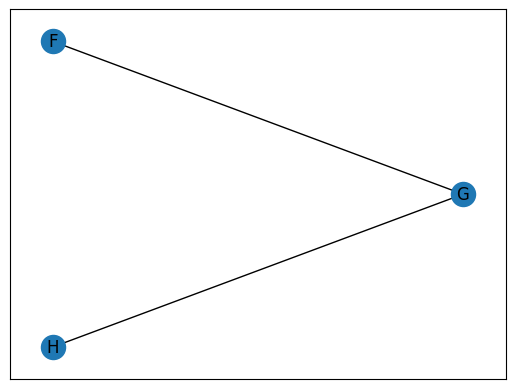

In [74]:
graph_1 = graph.subgraph(cc_list[1])
nx.draw_networkx(graph_1, pos=nx.circular_layout(graph_1))

In [76]:
print(nx.is_connected(graph_1))
print(nx.is_tree(graph_1))

True
True


In [91]:
# pyvisを使ったグラフ描画
from pyvis.network import Network

net = Network(notebook=True, cdn_resources="in_line")
net.from_nx(graph)
html = net.generate_html()
with open("../result/pyvis_graph.html", mode="w", encoding="utf-8") as f:
    f.write(html)


## 出力結果
[pyvis_graph.html](../result/pyvis_graph.html)

In [95]:
# GML(Graph Modeling Language)形式で出力
nx.write_gml(graph, "../result/graph.gml")

with open("../result/graph.gml", mode="r", encoding="utf-8") as f:
    print(f.read()[:200])

graph [
  node [
    id 0
    label "A"
    value 1
    size 10
  ]
  node [
    id 1
    label "B"
    value 2
    size 10
  ]
  node [
    id 2
    label "C"
    value 3
    size 10
  ]
  node [
   
